# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]
dummies = pd.get_dummies(df_select['category'])
X = pd.concat([dummies, df_select[['amt', 'city_pop', 'time_var']]],axis = 1) 
y = df_select['is_fraud']

<ipython-input-5-6dc876f6da61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
<ipython-input-5-6dc876f6da61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


In [21]:
X

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,amt,city_pop,time_var
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.86,333497,25
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,29.84,302,33
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,41.28,34496,53
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,60.05,54767,15
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.19,1126,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0,0,0,0,0,1,0,0,0,0,0,0,0,0,43.77,519,7
555715,0,0,0,0,0,0,0,1,0,0,0,0,0,0,111.84,28739,9
555716,0,0,0,0,0,0,0,1,0,0,0,0,0,0,86.88,3684,15
555717,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.99,129,24


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [8]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [9]:
ros = RandomOverSampler()
rus = RandomUnderSampler()
oversample = SMOTE(sampling_strategy="minority")
over_X, over_y = ros.fit_resample(X_train, y_train)
under_X, under_y = rus.fit_resample(X_train, y_train)
smote_X, smote_y = oversample.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models 

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model1 = LogisticRegression()
model2 = LogisticRegression()
model3 = LogisticRegression()

In [12]:
over_log = model1.fit(over_X, over_y)
under_log = model2.fit(under_X, under_y)
smote_log = model3.fit(smote_X, smote_y)

# 4.) Test the three models

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# make predictions on the test data
over_y_pred = over_log.predict(X_test)

# evaluate the model performance
accuracy = accuracy_score(y_test, over_y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, over_y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep = classification_report(y_test, over_y_pred)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8127654214352552
Confusion Matrix:
[[135022  31066]
 [   149    479]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90    166088
           1       0.02      0.76      0.03       628

    accuracy                           0.81    166716
   macro avg       0.51      0.79      0.46    166716
weighted avg       1.00      0.81      0.89    166716



In [14]:
# make predictions on the test data
under_y_pred = under_log.predict(X_test)

# evaluate the model performance
accuracy = accuracy_score(y_test, under_y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, under_y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep = classification_report(y_test, under_y_pred)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8111339043643082
Confusion Matrix:
[[134748  31340]
 [   147    481]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90    166088
           1       0.02      0.77      0.03       628

    accuracy                           0.81    166716
   macro avg       0.51      0.79      0.46    166716
weighted avg       1.00      0.81      0.89    166716



In [15]:
# make predictions on the test data
smote_y_pred = smote_log.predict(X_test)

# evaluate the model performance
accuracy = accuracy_score(y_test, smote_y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, smote_y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep = classification_report(y_test, smote_y_pred)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8199093068451738
Confusion Matrix:
[[136217  29871]
 [   153    475]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    166088
           1       0.02      0.76      0.03       628

    accuracy                           0.82    166716
   macro avg       0.51      0.79      0.47    166716
weighted avg       1.00      0.82      0.90    166716



# 5.) Which performed best in Out of Sample metrics?

The accuracy of SMOTE is the largest, so SMOTE performed best.

# 6.) Pick two features and plot the two classes before and after SMOTE.

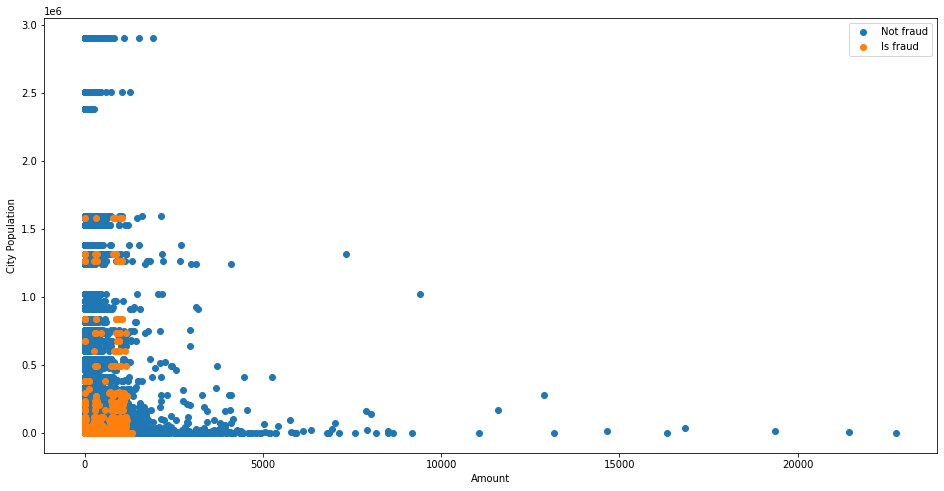

In [26]:
# Before SMOTE
df_before = pd.concat([X_train, y_train], axis = 1)
plt.figure(figsize = (16,8))
plt.scatter(df_before[df_before['is_fraud'] == 0]['amt'], df_before[df_before['is_fraud'] == 0]['city_pop'])
plt.scatter(df_before[df_before['is_fraud'] == 1]['amt'], df_before[df_before['is_fraud'] == 1]['city_pop'])
plt.legend(['Not fraud', 'Is fraud'])
plt.xlabel('Amount')
plt.ylabel('City Population')
plt.show()

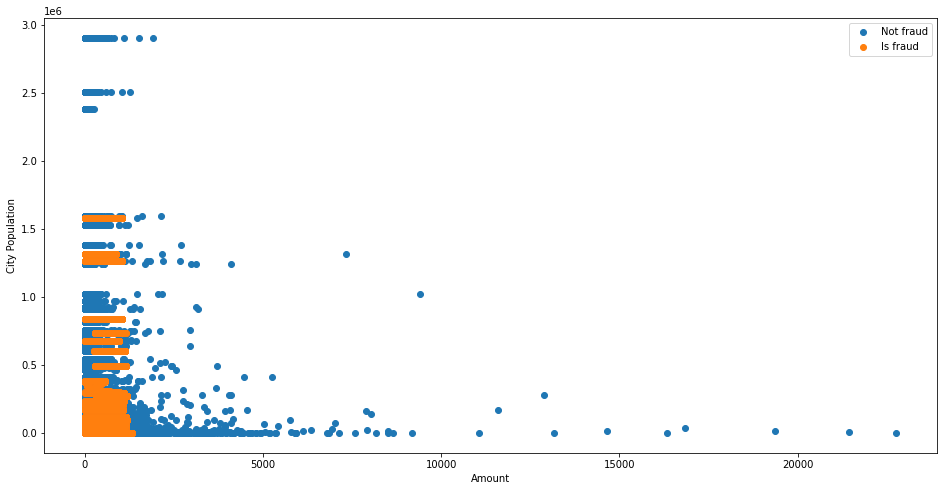

In [27]:
# After SMOTE
df_after = pd.concat([smote_X, smote_y], axis = 1)
plt.figure(figsize = (16,8))
plt.scatter(df_after[df_after['is_fraud'] == 0]['amt'], df_after[df_after['is_fraud'] == 0]['city_pop'])
plt.scatter(df_after[df_after['is_fraud'] == 1]['amt'], df_after[df_after['is_fraud'] == 1]['city_pop'])
plt.legend(['Not fraud', 'Is fraud'])
plt.xlabel('Amount')
plt.ylabel('City Population')
plt.show()